In [1]:
import numpy

In [2]:
# helpers
def random_weights(shape):
    # [0, 1)
    weights = numpy.random.random_sample(shape)
    # [-1, 1)
    return 2 * weights - 1

def error_rate(err):
    return numpy.mean(numpy.absolute(err))

In [3]:
# activation function and its derivative for backpropagation
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# input data
X = numpy.array([
        [0, 0, 1],
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 1]])

In [5]:
# output data
y = numpy.array([[0, 1, 1, 0]]).T

In [6]:
# define neural net topology
input_neurons = 3
hidden_neurons = 4
output_neurons = 1

con01 = (input_neurons, hidden_neurons)
con12 = (hidden_neurons, output_neurons)

In [7]:
# synapses
syn0 = random_weights(con01)
syn1 = random_weights(con12)

In [8]:
# learning curve (error rates)
learning = []
steps = range(6000)

In [9]:
# training step
for j in steps:
    # forward propagation
    layer0 = X # inputs
    layer1 = sigmoid(layer0.dot(syn0)) # hidden layer
    layer2 = sigmoid(layer1.dot(syn1)) # outputs
    
    l2_error = numpy.subtract(y, layer2)
    learning.append(error_rate(l2_error))
    
    # backpropagation
    l2_delta = l2_error * sigmoid_derivative(layer2)
    
    # TODO combine two expressions
    # l1_error not used anywhere else than l1_delta calculations
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid_derivative(layer1)
    
    # updating synapses weights
    syn1 += layer1.T.dot(l2_delta)
    syn0 += layer0.T.dot(l1_delta)

In [10]:
error_rate(l2_error)

0.014561439314528551

In [11]:
print y

[[0]
 [1]
 [1]
 [0]]


In [12]:
print layer2 # prediction

[[ 0.00703157]
 [ 0.9857832 ]
 [ 0.98232628]
 [ 0.01932367]]


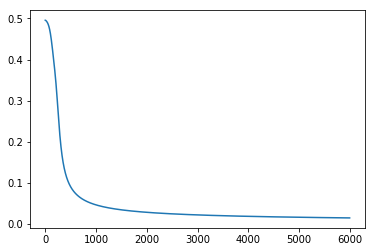

In [13]:
%matplotlib inline
from matplotlib.pyplot import plot
plot(steps, learning)